In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
URL_DATA = 'https://storage.data.gov.my/demography/births.parquet'

df = pd.read_parquet(URL_DATA)

In [14]:
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])
df = df.drop('state', axis=1 )
df = df.rename(columns={'date': 'birthdate'})

In [15]:
print(df)

       birthdate  births
0     1920-01-01      96
1     1920-01-02     115
2     1920-01-03     111
3     1920-01-04     101
4     1920-01-05      95
...          ...     ...
37828 2023-07-27    1199
37829 2023-07-28    1220
37830 2023-07-29     927
37831 2023-07-30     938
37832 2023-07-31    1098

[37833 rows x 2 columns]


In [18]:
df['year'] = df['birthdate'].dt.year
df['month'] = df['birthdate'].dt.month
df['date'] = df['birthdate'].dt.day

df = df[['birthdate', 'year', 'month', 'date', 'births']]
print(df)

       birthdate  year  month  date  births
0     1920-01-01  1920      1     1      96
1     1920-01-02  1920      1     2     115
2     1920-01-03  1920      1     3     111
3     1920-01-04  1920      1     4     101
4     1920-01-05  1920      1     5      95
...          ...   ...    ...   ...     ...
37828 2023-07-27  2023      7    27    1199
37829 2023-07-28  2023      7    28    1220
37830 2023-07-29  2023      7    29     927
37831 2023-07-30  2023      7    30     938
37832 2023-07-31  2023      7    31    1098

[37833 rows x 5 columns]


In [134]:
# Define the birth year ranges for each generation
generation_ranges = {
    'all' : (1920, 2025),
    'older' : (1920, 1980),
    'younger' : (1981, 2022),
    'silent': (1928, 1945), #17
    'boomer': (1946, 1964), #18
    'genX': (1965, 1980), #15
    'genY': (1981, 1996), #15
    'genZ': (1997, 2009), #12
    'genAlpha': (2010, 2022)
}

# Create an empty dictionary to store subsets of DataFrame for each generation
gen = {}

# Loop through the generation ranges
for generation, (start_year, end_year) in generation_ranges.items():
    # Filter the DataFrame for the current generation
    gen_df = df[(df['birthdate'].dt.year >= start_year) & (df['birthdate'].dt.year <= end_year)]
    
    # Store the subset DataFrame in the generations dictionary
    gen[generation] = gen_df

In [131]:
gen['genAlpha']

,birthdate,year,month,date,births
32873,2010-01-01,2010,1,1,1401
32874,2010-01-02,2010,1,2,1308
32875,2010-01-03,2010,1,3,1346
32876,2010-01-04,2010,1,4,1426
32877,2010-01-05,2010,1,5,1450
...,...,...,...,...,...
37616,2022-12-27,2022,12,27,1168
37617,2022-12-28,2022,12,28,1293
37618,2022-12-29,2022,12,29,1237
37619,2022-12-30,2022,12,30,1168


In [45]:
def generate_heatmap(genName):
    # Generate pivot table for the specified generation
    pivot_table = gen[genName].pivot_table(index='month', columns='date', values='births', aggfunc='sum')
    
    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, cmap='Blues', annot=False, robust=True)
    plt.title(f'Heatmap of Birthdates for {genName} by Date and Month')
    plt.xlabel('Date')
    plt.ylabel('Month')
    plt.show()

In [82]:
def top_birthdates(genName, N):
    top_N = gen[genName].sort_values(by='births', ascending=False).head(N)
    return top_N

In [93]:
def rarest_birthdates(genName, N):
    rare_N = gen[genName].sort_values(by='births', ascending=True).head(N)
    return rare_N

In [126]:
most_popular = top_birthdates('genZ', 1)
most_popular['birthdate']

32362   2008-08-08
Name: birthdate, dtype: datetime64[ns]

In [127]:
generation_summary = pd.DataFrame(columns=['Generation', 'Most Popular', 'Rarest'])

for i in gen:
    most_popular = top_birthdates(i, 1)['birthdate'].dt.date.tolist()
    rarest = rarest_birthdates(i, 1)['birthdate'].dt.date.tolist()
    
    generation_summary.loc[len(generation_summary)] = [i, most_popular, rarest]

generation_summary

,Generation,Most Popular,Rarest
0,all,[1936-12-31],[1922-12-25]
1,silent,[1936-12-31],[1928-12-25]
2,boomer,[1949-12-31],[1946-02-23]
3,genX,[1969-01-01],[1967-12-22]
4,genY,[1986-01-01],[1983-12-26]
5,genZ,[2008-08-08],[2003-02-02]
6,genAlpha,[2011-11-11],[2022-05-02]


In [ ]:
for i in gen:
    print('\n' + i)
    print(rarest_birthdates(i, 10))
    

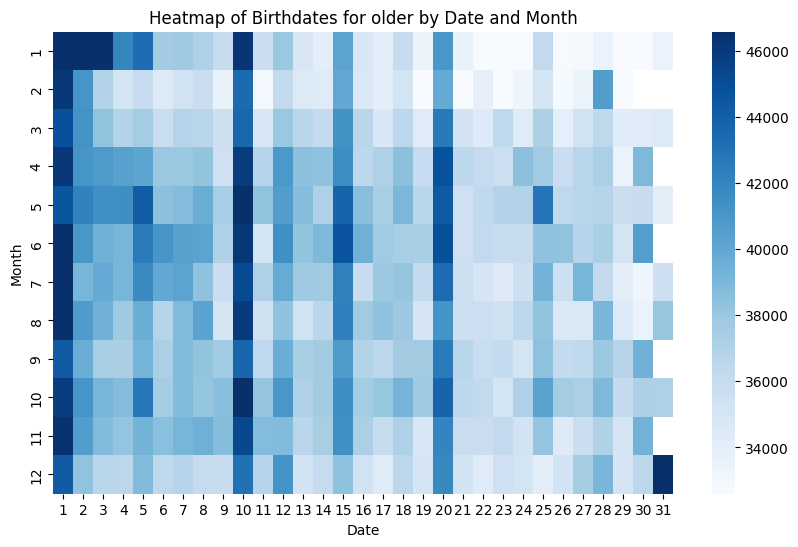

In [135]:
generate_heatmap('older')

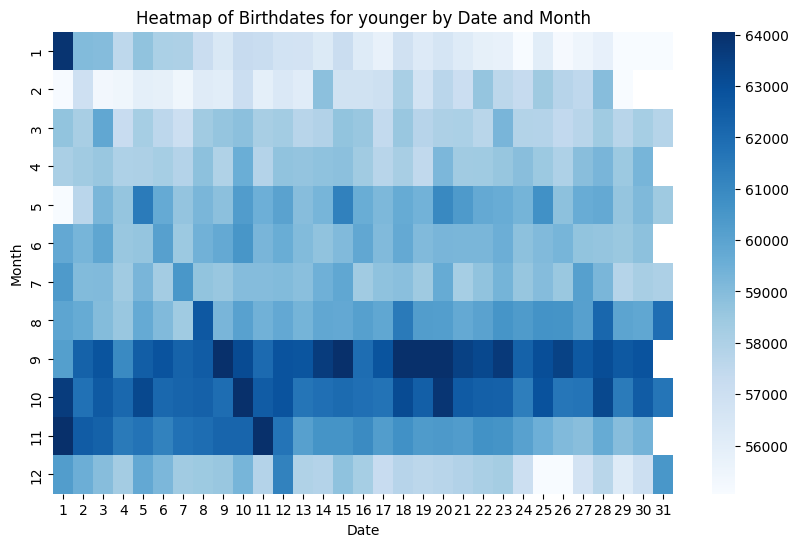

In [136]:
generate_heatmap('younger')

In [139]:
top_popular_genY = top_birthdates('genY', 5)

plt.figure(12, 8)
plt.bar(top_popular_genY['birthdate'].astype(str), )


popular birthdates 
    all
    genZ
    milleneal

rarest birthdates
    all 
    genz
    mill
